# 1. Data Preprocessing

In [3]:
# Import Library
import numpy as np  #numPy library for numerical and array operation
import pandas as pd #pandas library for data manipulation and analysis
import matplotlib.pyplot as plt #matplotlib library for data visualization
from sklearn.preprocessing import StandardScaler #the StandardScaler class from scikit-learn's preprocessing module
from sklearn import metrics #the metrics module from scikit-learn for evaluating machine learning models
import warnings  #the warnings module to handle warnings during code execution
import seaborn as sns #the seaborn library for data visualization
from numpy import set_printoptions
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings('ignore')
%matplotlib inline

### 1.1 Load Dataset

In [4]:
# Loading the dataset
data = pd.read_csv('emergency cases in RCHSP 2023.csv')
# Print the first 5 rows of the dataframe.
data.head()

,ROWNUM,Hospital,Eligibility Class,Gender,Arrival Time,Severity Level,Deparment,Main Diagnosis,Discharge Time,Waiting Time (Minutes),Length of Stay (Minutes)
0,1,Royal Commission Health Services Program,ROYAL COMMISSION,Female,12/13/2023 13:17:48,Level Ⅳ,Emergency Medicine,"Pain, unspecified",12/13/2023 16:43:00,14.0,205
1,2,Royal Commission Health Services Program,ROYAL COMMISSION,Female,12/08/2023 10:59:28,Level Ⅲ,Emergency Medicine,Low back pain,12/08/2023 12:50:00,7.0,111
2,3,Royal Commission Health Services Program,ROYAL COMMISSION,Female,11/05/2023 14:03:02,Level Ⅲ,Emergency Medicine,"Acute upper respiratory infection, unspecified",11/05/2023 14:54:00,24.0,51
3,4,Royal Commission Health Services Program,ROYAL COMMISSION,Female,10/07/2023 22:57:41,Level Ⅲ,Emergency Medicine,Epistaxis,10/08/2023 00:09:00,NaN,71
4,5,Royal Commission Health Services Program,ROYAL COMMISSION,Female,10/21/2023 21:32:17,Level Ⅳ,Emergency Medicine,"Acute upper respiratory infection, unspecified",10/21/2023 23:10:00,56.0,98


In [5]:
data.shape

(97096, 11)

### 1.2 Observing the data

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97096 entries, 0 to 97095
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   ROWNUM                    97096 non-null  object 
 1   Hospital                  97096 non-null  object 
 2   Eligibility Class         97055 non-null  object 
 3   Gender                    97096 non-null  object 
 4   Arrival Time              97096 non-null  object 
 5   Severity Level            95130 non-null  object 
 6   Deparment                 97096 non-null  object 
 7   Main Diagnosis            93826 non-null  object 
 8   Discharge Time            97087 non-null  object 
 9   Waiting Time (Minutes)    92419 non-null  float64
 10  Length of Stay (Minutes)  97087 non-null  object 
dtypes: float64(1), object(10)
memory usage: 8.1+ MB


In [7]:
# Display the "Make" coloumn to understand the content
print(data["Main Diagnosis"].unique()) #Get the unique values in the "Make" column 

['Pain, unspecified' 'Low back pain'
 'Acute upper respiratory infection, unspecified' ...
 'Feeding problem of newborn, unspecified' 'Haemangioma, unspecified site'
 'Neonatal erythema toxicum']


In [8]:
data['Main Diagnosis'].nunique()

1784

In [9]:
# calculate and store the count of missing (NaN) values in each column of the DataFrame 'data' 
data.isnull().sum()

ROWNUM                         0
Hospital                       0
Eligibility Class             41
Gender                         0
Arrival Time                   0
Severity Level              1966
Deparment                      0
Main Diagnosis              3270
Discharge Time                 9
Waiting Time (Minutes)      4677
Length of Stay (Minutes)       9
dtype: int64

In [10]:
# Apply a formatting fuction to the summary statistics to round value to 5 d.p
data.describe().apply(lambda s: s.apply('{0:.5f}'.format))

,Waiting Time (Minutes)
count,92419.00000
mean,31.78995
std,22.85905
min,0.00000
25%,15.00000
50%,26.00000
75%,42.00000
max,417.00000


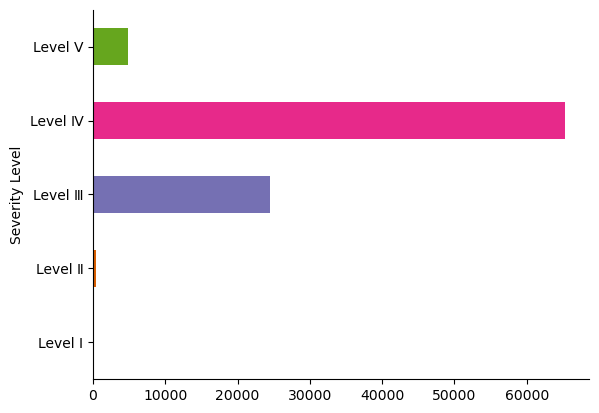

In [11]:
# Severity Level
data.groupby('Severity Level').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
# Plot histograms for the numeric columns to understand their distribution
def plot_distribution(data, column_name):
    plt.figure(figsize=(10,6))
    sns.histplot(data[column_name], kde=True)
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

# Plotting distributions for 'Waiting Time (Minutes)' and 'Length of Stay (Minutes)'
plot_distribution(data, 'Waiting Time (Minutes)')
plot_distribution(data, 'Length of Stay (Minutes)')

In [ ]:
# Plot boxplots to identify outliers
def plot_box(data, column_name):
    plt.figure(figsize=(10,6))
    sns.boxplot(data[column_name])
    plt.title(f'Boxplot of {column_name}')
    plt.grid(True)
    plt.show()

# Plotting boxplots for the numeric columns
plot_box(data, 'Waiting Time (Minutes)')
plot_box(data, 'Length of Stay (Minutes)')

In [ ]:
# Calculate Skewness and Kurtosis
def skewness_and_kurtosis(data, column_name):
    skewness = data[column_name].skew()
    kurtosis = data[column_name].kurtosis()
    print(f"Skewness of {column_name}: {skewness}")
    print(f"Kurtosis of {column_name}: {kurtosis}")

skewness_and_kurtosis(data, 'Waiting Time (Minutes)')
skewness_and_kurtosis(data, 'Length of Stay (Minutes)')

In [ ]:
# Normality Test
import scipy.stats as stats

def normality_test(data, column_name):
    stat, p = stats.shapiro(data[column_name].dropna())
    print(f'Shapiro-Wilk Test for {column_name}: Statistics={stat}, p={p}')
    if p > 0.05:
        print(f"{column_name} looks like a normal distribution (fail to reject H0)")
    else:
        print(f"{column_name} does not follow a normal distribution (reject H0)")

normality_test(data, 'Waiting Time (Minutes)')
normality_test(data, 'Length of Stay (Minutes)')

In [ ]:
# QQ Plot
def qq_plot(data, column_name):
    plt.figure(figsize=(8,6))
    stats.probplot(data[column_name].dropna(), dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {column_name}")
    plt.grid(True)
    plt.show()

qq_plot(data, 'Waiting Time (Minutes)')
qq_plot(data, 'Length of Stay (Minutes)')

In [ ]:
# Add new column "Treatment Time(Minutes)" to the DataFrame. If it <= 0, people leave before treatment.
data['Length of Stay (Minutes)'] = pd.to_numeric(data['Length of Stay (Minutes)'], errors='coerce')
data['Treatment Time(Minutes)'] = data['Length of Stay (Minutes)']-data['Waiting Time (Minutes)']